In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [9]:
est = pd.read_csv('est_results1308.csv')
raw = pd.read_csv('raw_data_results1308.csv')
est['city_id'] = est['index'].apply(lambda x: x.split('.')[0])
raw['city_id'] = raw['index'].apply(lambda x: x.split('.')[0])

est['month_dt'] = est['index'].apply(lambda x: x.split('.')[1])
raw['month_dt'] = raw['index'].apply(lambda x: x.split('.')[1])

est['name'] = 'est'
est['P_avg_per_m_sec_scaled'] = est['V1']
est.drop(columns = ['V1'], inplace=True)
raw['name'] = 'true'
df = pd.concat([est, raw])
df

,index,city_id,month_dt,name,P_avg_per_m_sec_scaled
0,104.2022-04-01,104,2022-04-01,est,2.490194
1,104.2022-05-01,104,2022-05-01,est,2.400532
2,104.2022-06-01,104,2022-06-01,est,2.376235
3,104.2022-07-01,104,2022-07-01,est,2.387099
4,104.2022-08-01,104,2022-08-01,est,2.442499
...,...,...,...,...,...
593,885.2024-01-01,885,2024-01-01,true,0.810004
594,885.2024-02-01,885,2024-02-01,true,0.878067
595,885.2024-03-01,885,2024-03-01,true,0.958612
596,885.2024-04-01,885,2024-04-01,true,0.939169


In [13]:
df = df.pivot(index=['city_id', 'month_dt'], columns='name', values='P_avg_per_m_sec_scaled').reset_index()
df['diff'] = df['true'] -df['est']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '2022-04-01'),
  Text(1, 0, '2022-05-01'),
  Text(2, 0, '2022-06-01'),
  Text(3, 0, '2022-07-01'),
  Text(4, 0, '2022-08-01'),
  Text(5, 0, '2022-09-01'),
  Text(6, 0, '2022-10-01'),
  Text(7, 0, '2022-11-01'),
  Text(8, 0, '2022-12-01'),
  Text(9, 0, '2023-01-01'),
  Text(10, 0, '2023-02-01'),
  Text(11, 0, '2023-03-01'),
  Text(12, 0, '2023-04-01'),
  Text(13, 0, '2023-05-01'),
  Text(14, 0, '2023-06-01'),
  Text(15, 0, '2023-07-01'),
  Text(16, 0, '2023-08-01'),
  Text(17, 0, '2023-09-01'),
  Text(18, 0, '2023-10-01'),
  Text(19, 0, '2023-11-01'),
  Text(20, 0, '2023-12-01'),
  Text(21, 0, '2024-01-01'),
  Text(22, 0, '2024-02-01'),
  Text(23, 0, '2024-03-01'),
  Text(24, 0, '2024-04-01'),
  Text(25, 0, '2024-05-01')])

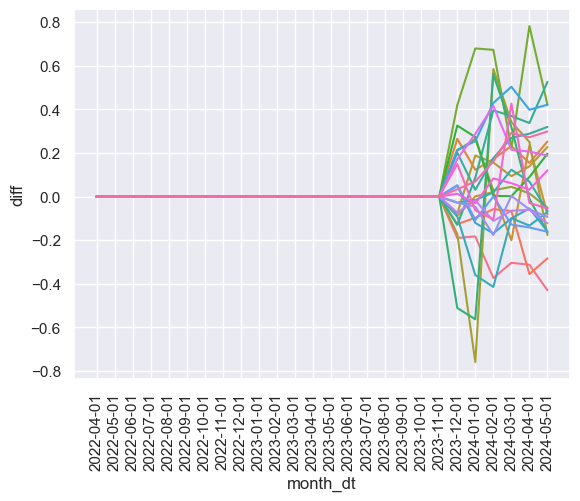

In [17]:
sns.lineplot(df, x = 'month_dt', y = 'diff', hue = 'city_id', legend=False)
plt.xticks(rotation =90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '2022-04-01'),
  Text(1, 0, '2022-05-01'),
  Text(2, 0, '2022-06-01'),
  Text(3, 0, '2022-07-01'),
  Text(4, 0, '2022-08-01'),
  Text(5, 0, '2022-09-01'),
  Text(6, 0, '2022-10-01'),
  Text(7, 0, '2022-11-01'),
  Text(8, 0, '2022-12-01'),
  Text(9, 0, '2023-01-01'),
  Text(10, 0, '2023-02-01'),
  Text(11, 0, '2023-03-01'),
  Text(12, 0, '2023-04-01'),
  Text(13, 0, '2023-05-01'),
  Text(14, 0, '2023-06-01'),
  Text(15, 0, '2023-07-01'),
  Text(16, 0, '2023-08-01'),
  Text(17, 0, '2023-09-01'),
  Text(18, 0, '2023-10-01'),
  Text(19, 0, '2023-11-01'),
  Text(20, 0, '2023-12-01'),
  Text(21, 0, '2024-01-01'),
  Text(22, 0, '2024-02-01'),
  Text(23, 0, '2024-03-01'),
  Text(24, 0, '2024-04-01'),
  Text(25, 0, '2024-05-01')])

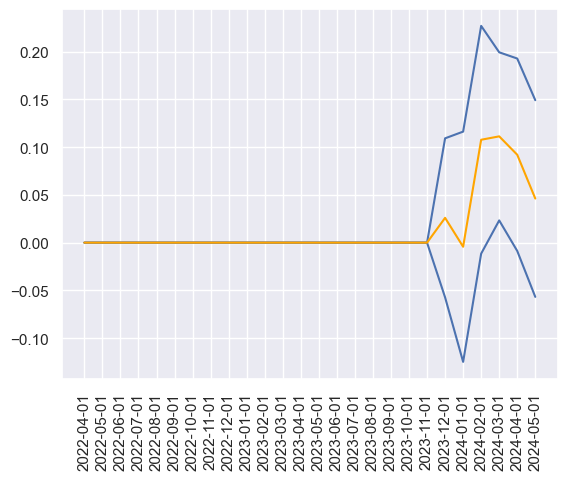

In [64]:
m = pd.Series(df.groupby('month_dt').agg({'diff':'mean'})['diff'])
s = pd.Series(df.groupby('month_dt').agg({'diff':'std'})['diff'])
n = pd.Series(df.groupby('month_dt').agg({'diff':'size'})['diff'])
month = pd.Series(df.groupby('month_dt', as_index=False).agg({'diff':'mean'})['month_dt'])
upper = m + 1.96*s/(n.apply(lambda x: x**0.5))
lower = m - 1.96*s/(n.apply(lambda x: x**0.5))


tmp = pd.DataFrame({'upper':upper, 'lower':lower, 'mean':m}).reset_index()
plt.plot(tmp['month_dt'], tmp['upper'], color = 'b')
plt.plot(tmp['month_dt'], tmp['lower'], color = 'b')
plt.plot(tmp['month_dt'], tmp['mean'], color = 'orange')
plt.xticks(rotation =90)
